# Food Forensics: Predicting Allergens in Your Plate

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

In [2]:
df=pd.read_csv('food_ingredients_and_allergens.csv')
df.head(10)

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
1,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
3,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,Contains
6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,Contains
7,Caesar Salad,Romaine lettuce,None,Olive oil,Parmesan cheese,Dairy,Contains
8,Caesar Wrap,Grilled chicken,None,Caesar dressing,"Lettuce, Parmesan cheese",Dairy,Contains
9,Strawberry Smoothie,Strawberries,Honey,"Yogurt (milk, cultures)",None,Dairy,Contains


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Food Product     399 non-null    object
 1   Main Ingredient  399 non-null    object
 2   Sweetener        399 non-null    object
 3   Fat/Oil          399 non-null    object
 4   Seasoning        399 non-null    object
 5   Allergens        399 non-null    object
 6   Prediction       398 non-null    object
dtypes: object(7)
memory usage: 21.9+ KB


In [4]:
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 90


In [5]:
df = df.drop_duplicates()
duplicates = df.duplicated().sum()
print(f'Duplicate rows: {duplicates}')

Duplicate rows: 0


In [6]:
df.isna().sum()

Food Product       0
Main Ingredient    0
Sweetener          0
Fat/Oil            0
Seasoning          0
Allergens          0
Prediction         1
dtype: int64

In [7]:
df.dropna()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains
5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,Contains
6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,Contains
...,...,...,...,...,...,...,...
393,Lemon Bars,Lemon juice,Sugar,Butter,"Flour, eggs","Wheat, Dairy, Eggs",Contains
395,Pecan Pie,Pecans,Sugar,Butter,Corn syrup,"Wheat, Dairy, Nuts",Contains
396,Zucchini Bread,Zucchini,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains
397,Banana Bread,Bananas,Sugar,Butter,"Cinnamon, nuts","Wheat, Dairy, Nuts",Contains


In [8]:
df.Prediction.value_counts()

Contains            197
Does not contain    111
Name: Prediction, dtype: int64

In [9]:
#Setting Binary values for Prediction Column
df['Prediction_binary'] = df['Prediction'].map({'Contains': 1, 'Does not contain': 0})
df['Prediction_binary'].value_counts()

1.0    197
0.0    111
Name: Prediction_binary, dtype: int64

In [10]:
df['Prediction_binary'].isnull().sum()


1

In [11]:
df = df.dropna(subset=['Prediction_binary'])
df['Prediction_binary'].isnull().sum()

0

### Building a Simple Prediction Model

In [12]:
#Checking whether the assumptions are met for Logistic regression

df.head()

,Food Product,Main Ingredient,Sweetener,Fat/Oil,Seasoning,Allergens,Prediction,Prediction_binary
0,Almond Cookies,Almonds,Sugar,Butter,Flour,"Almonds, Wheat, Dairy",Contains,1.0
2,Chicken Noodle Soup,Chicken broth,None,None,Salt,"Chicken, Wheat, Celery",Contains,1.0
4,Cheddar Cheese,Cheese,None,None,Salt,Dairy,Contains,1.0
5,Ranch Dressing,Buttermilk,Sugar,Vegetable oil,"Garlic, herbs",Dairy,Contains,1.0
6,Caramel Popcorn,Popcorn,Sugar,Butter,Salt,Dairy,Contains,1.0


LogisticRegression()

In [14]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = log_reg.predict(X_test)


print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.854839
Precision: 0.900000
Recall: 0.878049
F1 Score: 0.888889


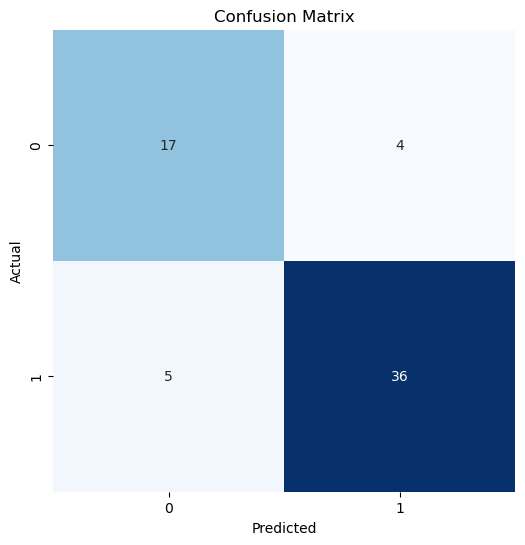

In [15]:
# Create a confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])

# Set axis labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

Confusion Matrix:
 [[17  4]
 [ 5 36]]


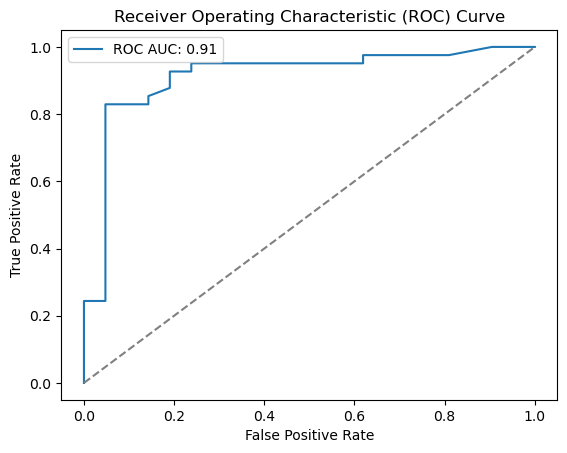

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Get the predicted labels for the test set
y_test_pred = log_reg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Get the predicted probabilities for the test set
y_test_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"ROC AUC: {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()